In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering
pd.options.mode.chained_assignment = None
from mpl_toolkits.mplot3d import Axes3D

In [75]:
# df = pd.read_csv('https://raw.githubusercontent.com/OHrydko/Machine-Learning-Labs/master/lab1/MP-07-Hrydko.csv', 
#                  header= None, names=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'y'], sep=';',engine='python')
df = pd.read_csv('https://raw.githubusercontent.com/OHrydko/Machine-Learning-Labs/master/lab4/Extra%20Data.csv', 
                 header= None, names=['x0', 'x1', 'x2', 'x3', 'x4', 'x5','x6', 'y'], sep=';',engine='python')
X, y = df[df.columns[:-1]].values,df['y'].values
list_clusters = [2, 3]
df

,x0,x1,x2,x3,x4,x5,x6,y
0,0.510,0.385,0.145,0.7665,0.3985,0.1400,0.1805,8
1,0.515,0.395,0.135,0.5160,0.2015,0.1320,0.1620,9
2,0.515,0.410,0.140,0.7355,0.3065,0.1370,0.2000,7
3,0.515,0.390,0.110,0.5310,0.2415,0.0980,0.1615,8
4,0.525,0.385,0.130,0.6070,0.2355,0.1250,0.1950,8
...,...,...,...,...,...,...,...,...
245,0.610,0.485,0.170,1.2810,0.5970,0.3035,0.3300,9
246,0.620,0.500,0.170,1.1480,0.5475,0.2200,0.3315,10
247,0.625,0.490,0.110,1.1360,0.5265,0.1915,0.2925,9
248,0.635,0.510,0.170,1.2235,0.5320,0.2710,0.3540,9


count of clusters = 2
[[0.49527778 0.37921296 0.12240741 0.60816204 0.28006019 0.12939352
  0.17321296]
 [0.62820423 0.49190141 0.16933099 1.28616901 0.60002465 0.28644718
  0.34491901]]


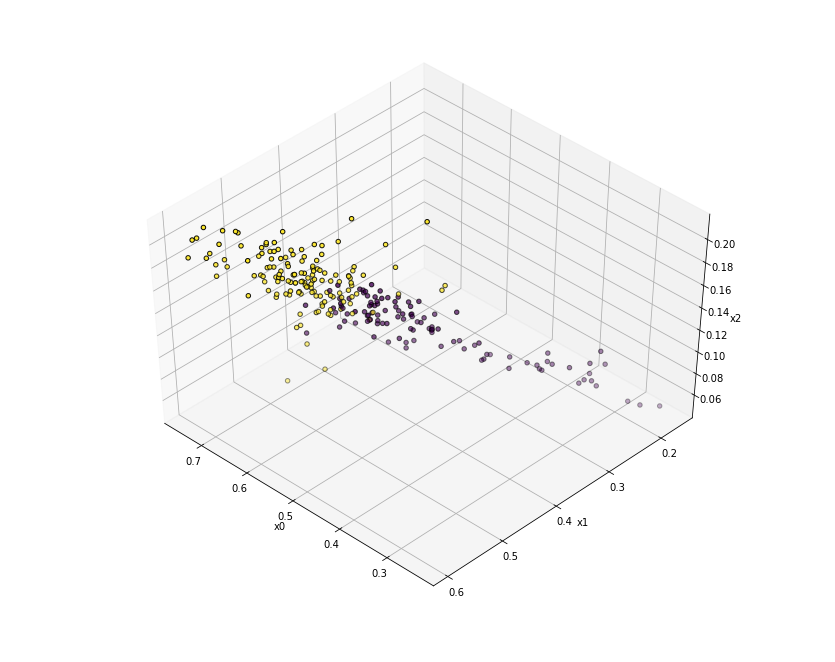

In [113]:
#KMeans
#2
print('count of clusters = {}'.format(list_clusters[0]))
kmeans = KMeans(n_clusters = list_clusters[0]).fit(X)
centers = kmeans.cluster_centers_
print(centers)
labels = kmeans.labels_
y_kmeans = kmeans.predict(X)
two_k_means = df[df.columns[:-1]]
two_k_means['two_cluster'] = labels.reshape(len(two_k_means), 1)
two_k_means.head()
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

draw(labels)

count of clusters = 3
[[0.67311111 0.52611111 0.18811111 1.62547778 0.76874444 0.3611
  0.42502222]
 [0.44344262 0.33590164 0.10803279 0.42982787 0.19243443 0.09248361
  0.12603279]
 [0.59274306 0.46277778 0.15423611 1.03438542 0.47998611 0.22749306
  0.28382986]]


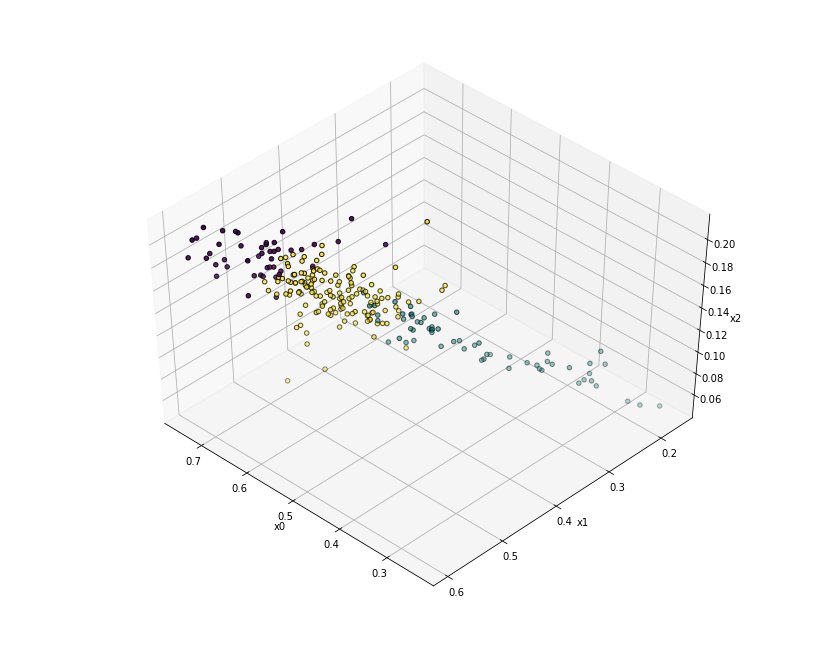

In [114]:
#KMeans
#3
print('count of clusters = {}'.format(list_clusters[1]))
kmeans = KMeans(n_clusters = list_clusters[1]).fit(X)
centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)
print(centers)
labels = kmeans.labels_
three_k_means = df[df.columns[:-1]]
three_k_means['three_cluster'] = labels.reshape(len(three_k_means), 1)
three_k_means.head()
draw(labels)

count of clusters = 2


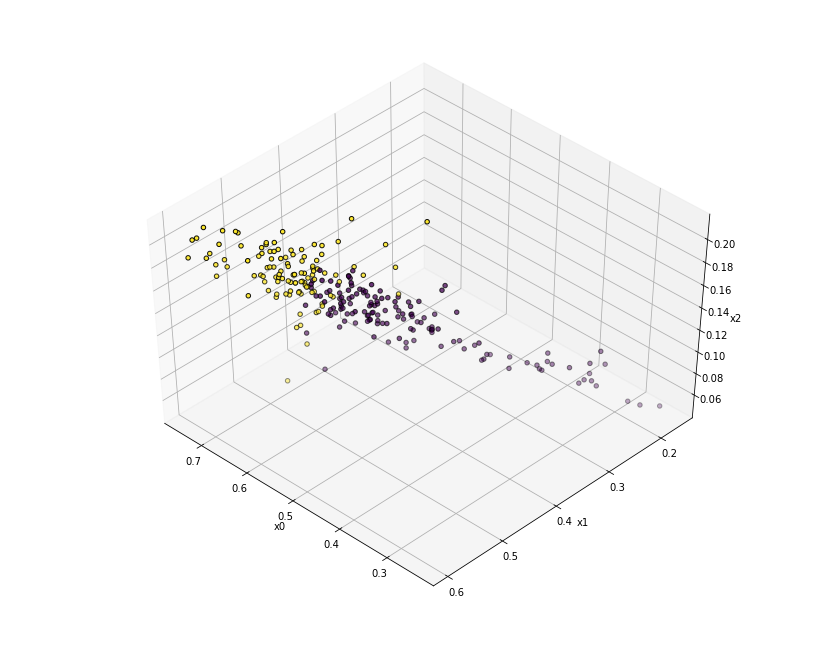

In [117]:
#AgglomerativeClustering
#2
print('count of clusters = {}'.format(list_clusters[0]))
clustering = AgglomerativeClustering(n_clusters = list_clusters[0]).fit(X)
labels = clustering.labels_
two_agg = df[df.columns[:-1]]
two_agg['two_cluster'] = labels.reshape(len(two_agg), 1)
two_agg.head(10)
# plt.scatter(X[:, 0], X[:, 1], c=labels)
draw(labels)


count of clusters = 3


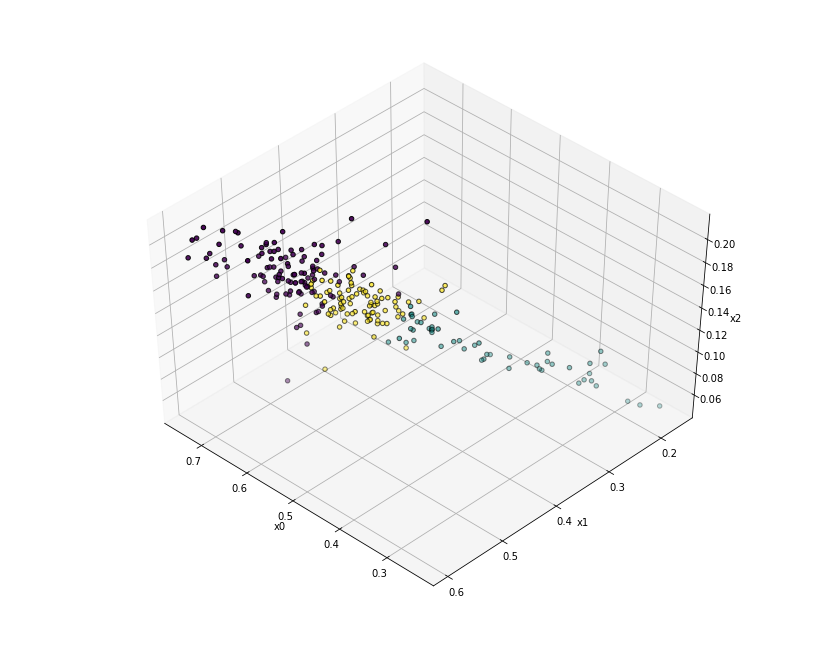

In [116]:
#AgglomerativeClustering
#3
print('count of clusters = {}'.format(list_clusters[1]))
clustering = AgglomerativeClustering(n_clusters = list_clusters[1]).fit(X)
labels = clustering.labels_
three_agg = df[df.columns[:-1]]
three_agg['three_cluster'] = labels.reshape(len(three_agg), 1)
three_agg.head(10)
draw(labels)

count of clusters = 2


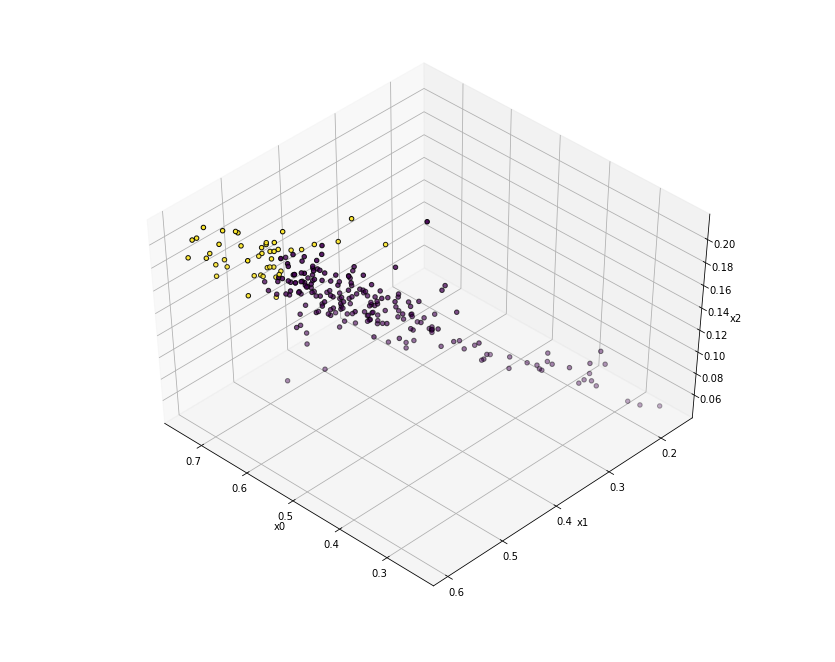

In [120]:
#AgglomerativeClustering 
print('count of clusters = {}'.format(list_clusters[0]))
clustering = AgglomerativeClustering(n_clusters = list_clusters[0], linkage ='complete', affinity ='manhattan').fit(X)
labels = clustering.labels_
two_agg_complete = df[df.columns[:-1]]
two_agg_complete['two_cluster'] = labels.reshape(len(two_agg_complete), 1)
two_agg_complete.head(10)
draw(labels)

count of clusters = 3


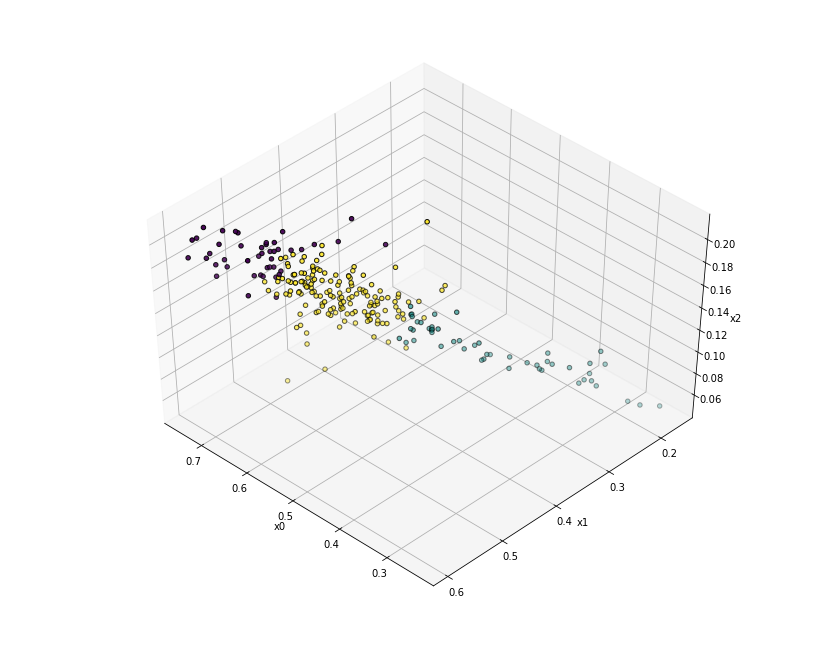

In [119]:
#AgglomerativeClustering 
print('count of clusters = {}'.format(list_clusters[1]))
clustering = AgglomerativeClustering(n_clusters = list_clusters[1], linkage ='complete', affinity ='manhattan').fit(X)
labels = clustering.labels_
three_agg_complete = df[df.columns[:-1]]
three_agg_complete['three_cluster'] = labels.reshape(len(three_agg_complete), 1)
three_agg_complete.head(10)
draw(labels)

In [63]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


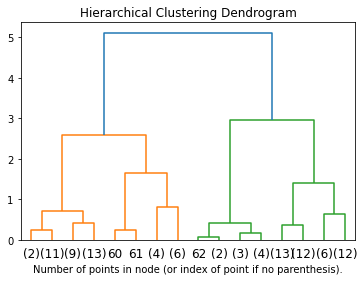

In [64]:
X = X[:100]

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [112]:
def draw(labels):
    fig = plt.figure(figsize=(12, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    ax.scatter(X[:, 0], X[:, 1], X[:, 2],
               c=labels.astype(float), edgecolor='k')

    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    ax.set_zlabel('x2')
    ax.dist = 12

In [69]:
res = df[[df.columns[-1]]]
res['KMeans2'] = two_k_means['two_cluster']
res['Agglomerative2'] = two_agg['two_cluster']
res['AgglomerativeComplete2'] = two_agg_complete['two_cluster']
res['KMeans3'] = three_k_means['three_cluster']
res['Agglomerative3'] = three_agg['three_cluster']
res['AgglomerativeComplete3'] = three_agg_complete['three_cluster']

In [70]:
res.head(25)

,y,KMeans2,Agglomerative2,AgglomerativeComplete2,KMeans3,Agglomerative3,AgglomerativeComplete3
0,8,0,0,0,1,2,2
1,9,0,0,0,2,1,1
2,7,0,0,0,2,2,2
3,8,0,0,0,2,1,1
4,8,0,0,0,2,1,1
5,10,0,0,0,2,2,2
6,8,0,0,0,2,1,2
7,9,0,0,0,2,1,1
8,10,0,0,0,1,2,2
9,8,0,0,0,1,2,2
